In [1]:
import numpy as np
import pandas as pd
from src.fetch import fetch_restaurant_inspection_data

In [2]:
%cd ..
df = fetch_restaurant_inspection_data()

/home/cole/Documents/BDS/bds-final-project


In [3]:
df = df.loc[pd.to_numeric(df['inspection_year']) != 1900]

In [4]:
ids = ['camis', 'dba', 'boro', 'building', 'street', 'zip', 'phone', 
       'inspection_year', 'inspection_month', 'inspection_day']

In [5]:
df.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zip', 'phone',
       'cuisine_description', 'critical_flag', 'score', 'grade', 'is_closed',
       'violation_count', 'inspection_year', 'inspection_month',
       'inspection_day', 'total_inspections', 'violation_ratio'],
      dtype='object')

In [30]:
dfdd = df.drop(ids, 1)
dfdd = dfdd.dropna()

In [31]:
from sklearn.preprocessing import LabelEncoder
cuisine_labels = LabelEncoder().fit_transform(df['cuisine_description'])
is_closed_labels = np.where(df['is_closed'], 1, 0)

In [32]:
from sklearn.preprocessing import LabelEncoder
cuisine_labels = LabelEncoder().fit_transform(dfdd['cuisine_description'])
is_closed_labels = np.where(dfdd['is_closed'], 1, 0)

dfdd = dfdd.drop(['cuisine_description', 'is_closed'], 1)

In [44]:
from sklearn.utils import resample

dfdd['closed'] = is_closed_labels
open_downsample = dfdd.loc[dfdd['closed'] == 0].sample(sum(is_closed_labels))
s = pd.concat([open_downsample, dfdd.loc[dfdd['closed'] == 1]])

dfdd = resample(s, n_samples=2000)

# dfdd, is_closed_samples = resample(dfdd, is_closed_labels, n_samples=10000)

In [ ]:
is_closed_labels = dfdd['closed']

In [47]:
dfdd = dfdd.drop('closed', 1)

In [48]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# p = PCA(n_components=2)
p = TSNE(n_components=3)
pca = p.fit_transform(dfdd)

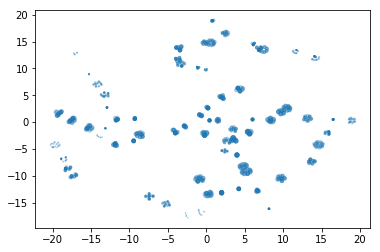

In [55]:
# %matplotlib inline
from matplotlib import pyplot as plt

plt.scatter(pca[:,0], pca[:,1], pca[:,2], alpha=0.3)
plt.show()

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=300, learning_rate=0.4)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfdd.drop(['score', 'violation_count', 'total_inspections'], 1), is_closed_labels)

In [125]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, gbm.predict(X_test))

array([[6156,   15],
       [  19,    0]])

In [22]:
dfdd['closed'] = is_closed_labels
violations_closed = dfdd.loc[dfdd['closed'] == 1]['violation_count']

In [23]:
violations_open = dfdd.loc[dfdd['closed'] == 0]['violation_count']

In [30]:
from sklearn.preprocessing import MinMaxScaler
violations_closed = MinMaxScaler().fit_transform(np.array(violations_closed).reshape(-1, 1))
violations_open = MinMaxScaler().fit_transform(np.array(violations_open).reshape(-1, 1))

/home/cole/.anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/cole/.anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


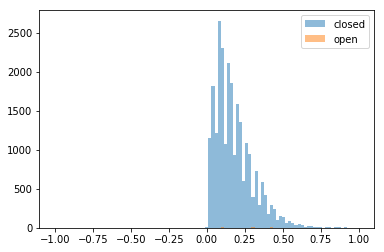

In [32]:
%matplotlib inline
from matplotlib import pyplot
x = violations_open
y =violations_closed

bins = np.linspace(-1.0, 1.0, 100)

pyplot.hist(x, bins, alpha=0.5, label='closed')
pyplot.hist(y, bins, alpha=0.5, label='open')
pyplot.legend(loc='upper right')
pyplot.show()

In [25]:
dfdd.corr()

,critical_flag,score,grade,violation_count,total_inspections,violation_ratio,closed
critical_flag,1.000000,0.640059,-0.544126,0.962015,0.962327,-0.022775,0.073821
score,0.640059,1.000000,-0.491202,0.603438,0.607867,-0.020494,0.122955
grade,-0.544126,-0.491202,1.000000,-0.519731,-0.525445,0.065615,-0.067316
violation_count,0.962015,0.603438,-0.519731,1.000000,0.997729,-0.002612,0.070000
total_inspections,0.962327,0.607867,-0.525445,0.997729,1.000000,-0.048220,0.070803
violation_ratio,-0.022775,-0.020494,0.065615,-0.002612,-0.048220,1.000000,-0.007936
closed,0.073821,0.122955,-0.067316,0.070000,0.070803,-0.007936,1.000000
